<a href="https://colab.research.google.com/github/irsyaddani/PCVK_2024_17/blob/main/Week12_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Irsyad Danisaputra
<br> NIM: 2241720233
<br> Absen: 17
<br> Kelas: TI-3E

## TUGAS PRAKTIKUM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Kuliah/Semester5/PCVK/Modul12/face_detection/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut.

  Perhatikan pada hasil face detection diatas. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

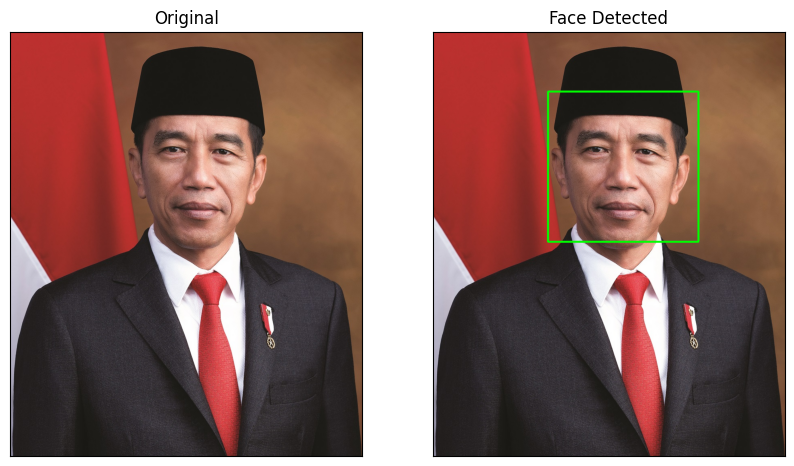

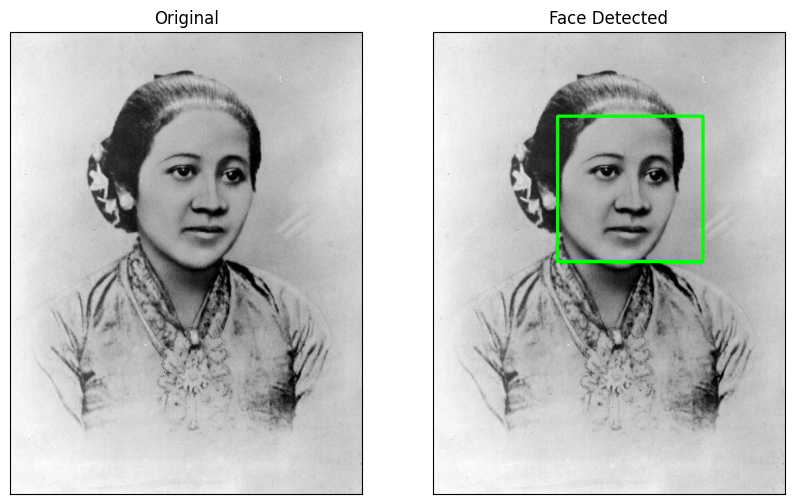

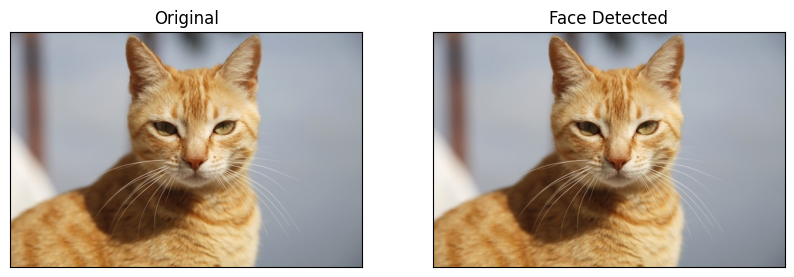

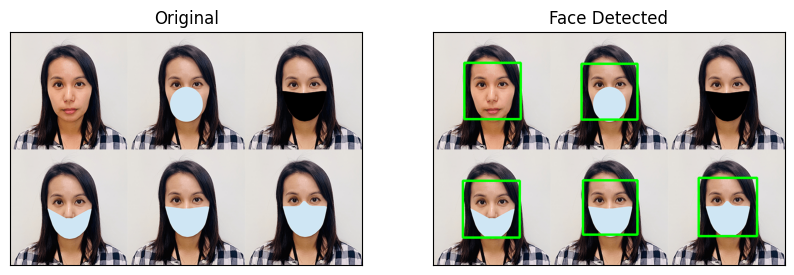

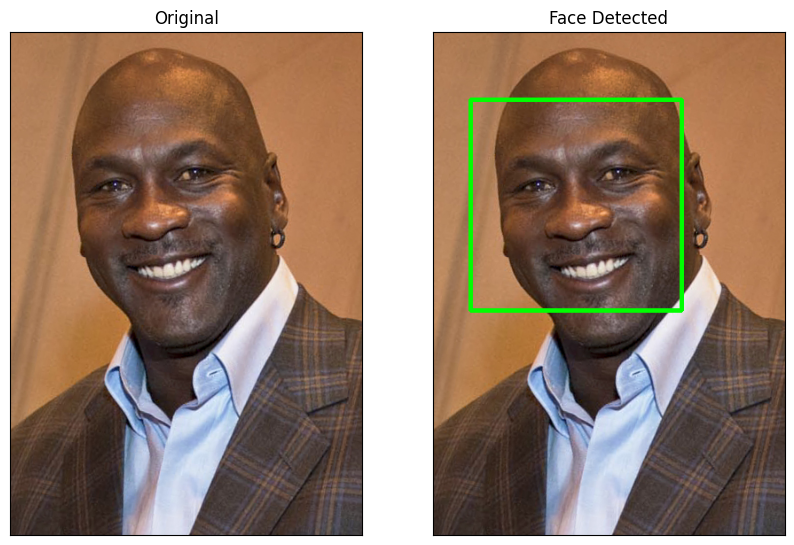

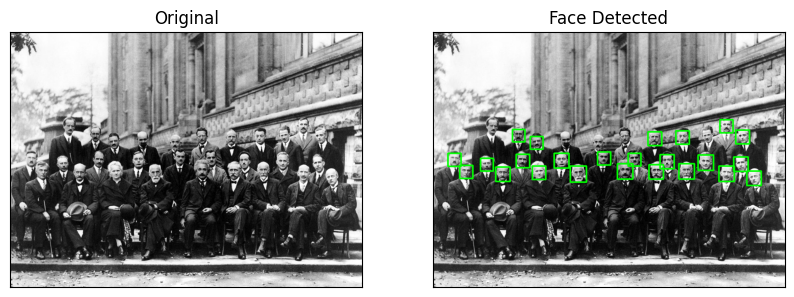

In [ ]:
#fungsi face detection
def face_detection(img):
  #Load Haar Cascade untuk wajah
  path_xml = path + 'haarcascade_frontalface_alt.xml'
  #face casecade
  face_cascade = cv.CascadeClassifier(path_xml)

  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #convert gray
  face = face_cascade.detectMultiScale(img_gray, 1.2, 6) #deteksi wajah dengan multi scale
  img_rectangle = img.copy() #bounding box
  #bounding box
  for(x,y,w,h) in face:
    cv.rectangle(img_rectangle,(x,y),(x+w,y+h),(0,255,0),3)

  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

  # Plot
  plt.figure(figsize=(10, 10))
  plt.subplot(121)
  plt.imshow(img)
  plt.title('Original')
  plt.xticks([]), plt.yticks([])

  plt.subplot(122)
  plt.imshow(cv.cvtColor(img_rectangle, cv.COLOR_BGR2RGB))
  plt.title('Face Detected')
  plt.xticks([]), plt.yticks([])


#jokowi
jokowi = cv.imread(path + 'jokowi.jpg')
face_detection(jokowi)

#kartini
kartini = cv.imread(path + 'kartini.jpg')
face_detection(kartini)

#kucing
mycat = cv.imread(path + 'mycat.jpg')
face_detection(mycat)

#mask
mask = cv.imread(path + 'mask.png')
face_detection(mask)

#mjordan
mjordan = cv.imread(path + 'mjordan.jpg')
face_detection(mjordan)

#solvayconf
solvayconf = cv.imread(path + 'solvayconf.jpg')
face_detection(solvayconf)

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

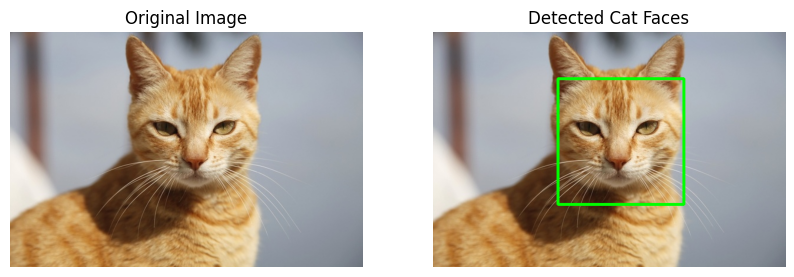

In [ ]:
# Load gambar
mycat = cv.imread(path + 'mycat.jpg')
mycat_gray = cv.cvtColor(mycat, cv.COLOR_BGR2GRAY)
mycat_gray = cv.equalizeHist(mycat_gray)

# Load Haar Cascade untuk wajah kucing
path_xml = path + 'haarcascade_frontalcatface.xml'

#face casecade
cat_cascade = cv.CascadeClassifier(path_xml)

# Deteksi wajah kucing
cat_faces = cat_cascade.detectMultiScale(mycat_gray, scaleFactor=1.3, minNeighbors=7, minSize=(50, 50))

# Salin gambar untuk menggambar bounding box
mycat_result = mycat.copy()

for (x, y, w, h) in cat_faces:
 cv.rectangle(mycat_result, (x, y), (x+w, y+h), (0, 255, 0), 3)

# plot
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv.cvtColor(mycat, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv.cvtColor(mycat_result, cv.COLOR_BGR2RGB))
plt.title('Detected Cat Faces')
plt.axis('off')

plt.show()

4. Cobakan juga untuk eyes detection.

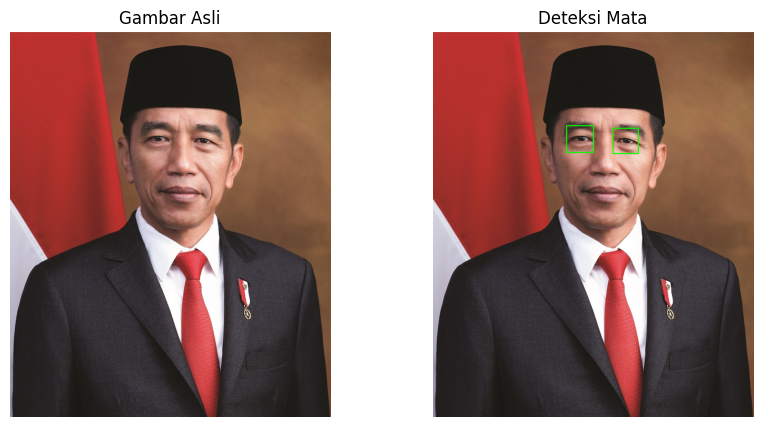

In [ ]:
# Muat gambar
jokowi = cv.imread(path + 'jokowi.jpg')
jokowi_gray = cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY)
jokowi_gray = cv.equalizeHist(jokowi_gray)

# Muat Haar Cascade untuk deteksi wajah dan mata
face_cascade_path = path + 'haarcascade_frontalface_alt.xml'
eye_cascade_path = path + 'haarcascade_eye.xml'

face_cascade = cv.CascadeClassifier(face_cascade_path)
eye_cascade = cv.CascadeClassifier(eye_cascade_path)

# Deteksi wajah
faces = face_cascade.detectMultiScale(jokowi_gray, scaleFactor=1.2, minNeighbors=6)

# Salin gambar asli untuk hasil akhir
jokowi_result = jokowi.copy()

# Iterasi melalui wajah yang terdeteksi
for (x, y, w, h) in faces:
    # Deteksi mata dalam wilayah wajah
    eyes = eye_cascade.detectMultiScale(jokowi_gray, scaleFactor=1.1, minNeighbors=3)

    for (ex, ey, ew, eh) in eyes:
        # Gambarkan kotak pembatas di sekitar mata
        cv.rectangle(jokowi_result, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# Plot hasil
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(121)
plt.imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Gambar dengan deteksi mata
plt.subplot(122)
plt.imshow(cv.cvtColor(jokowi_result, cv.COLOR_BGR2RGB))
plt.title('Deteksi Mata')
plt.axis('off')

plt.show()

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [ ]:
from base64 import b64decode, b64encode
from google.colab.output import eval_js
from google.colab import output
from IPython.display import display, Javascript, Image
import PIL
import io
import html
import time
import cv2

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

NameError: name 'js_to_image' is not defined

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya. Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

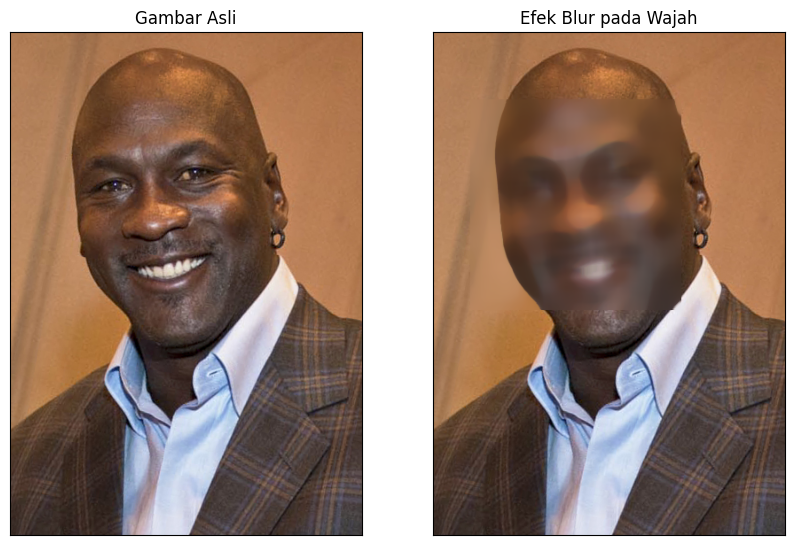

In [ ]:
# Muat gambar Michael Jordan
image = cv.imread(path + 'mjordan.jpg')
cascade_path = path + 'haarcascade_frontalface_alt.xml'

# Muat model Haar Cascade untuk deteksi wajah
face_cascade = cv.CascadeClassifier(cascade_path)

# Ubah gambar menjadi skala abu-abu
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Deteksi area wajah dalam gambar
detected_faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=6)

# Salin gambar asli untuk hasil blurring
blurred_image = image.copy()

# Terapkan efek blur pada setiap wajah yang terdeteksi
for (x, y, w, h) in detected_faces:
    face_region = image[y:y+h, x:x+w]  # Area wajah
    blurred_face = cv.medianBlur(face_region, 25)  # Terapkan efek blur dengan kernel size 25
    blurred_image[y:y+h, x:x+w] = blurred_face  # Gantikan area wajah dengan hasil blur

# Ubah format warna ke RGB untuk keperluan visualisasi dengan Matplotlib
original_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
blurred_rgb = cv.cvtColor(blurred_image, cv.COLOR_BGR2RGB)

# Tampilkan gambar asli dan hasil blur menggunakan Matplotlib
plt.figure(figsize=(10, 10))

# Gambar asli
plt.subplot(121)
plt.imshow(original_rgb)
plt.title('Gambar Asli')
plt.xticks([]), plt.yticks([])

# Gambar dengan efek blur pada wajah
plt.subplot(122)
plt.imshow(blurred_rgb)
plt.title('Efek Blur pada Wajah')
plt.xticks([]), plt.yticks([])

plt.show()

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

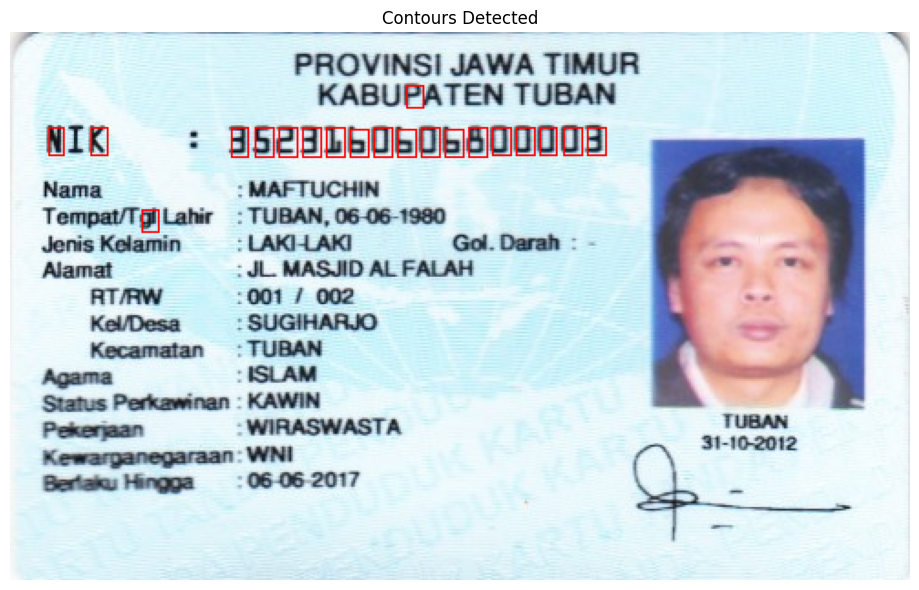

In [ ]:
import cv2 as cv
import os

#  Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban
ktp = cv.imread(path + 'ktp3.png')

# Menerapkan Gaussian Blur
blurred = cv.GaussianBlur(ktp.copy(), (5, 5), 0.5)

# Ubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

_, binary_image = cv.threshold(bw, 128, 255, cv.THRESH_BINARY_INV)
# Kernel untuk operasi morfologi
kernel = np.ones((2, 2), np.uint8)
# Operasi morfologi: Opening untuk memisahkan karakter
morph_image = cv.morphologyEx(binary_image, cv.MORPH_CLOSE, kernel, iterations=1)

# Temukan kontur
contours, _ = cv.findContours(morph_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Tentukan batasan ukuran dan rasio untuk karakter NIK
min_area = 55
max_area = 130
aspect_ratio_range = (0.01, 0.9)

# Gambar asli untuk visualisasi kontur
output_image = ktp.copy()

for contour in contours:
    # Dapatkan bounding box dari setiap kontur
    x, y, w, h = cv.boundingRect(contour)

    # Hitung area dan rasio aspek dari bounding box
    area = cv.contourArea(contour)
    aspect_ratio = float(w) / h

    # Filter kontur berdasarkan ukuran dan rasio aspek
    if min_area <= area <= max_area and aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1]:
        # Gambar bounding box pada karakter yang terdeteksi
        cv.rectangle(output_image, (x, y), (x + w, y + h), (0, 0, 255), 1)

# Visualisasi hasil
plt.figure(figsize=(10, 6))

plt.imshow(cv.cvtColor(output_image,cv.COLOR_BGR2RGB))
plt.title("Contours Detected")
plt.axis("off")

plt.tight_layout()
plt.show()

8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

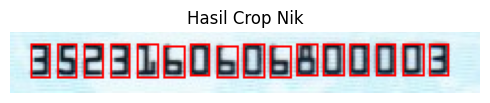

In [ ]:
import cv2 as cv
import os

#  Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban
ktp = cv.imread(path + 'ktp3.png')

# Area NIK
x = 110
y = 45
w = 230
h = 30

ktp = ktp[y:y+h,x:x+w]

# Menerapkan Gaussian Blur
blurred = cv.GaussianBlur(ktp.copy(), (5, 5), 0.5)

# Ubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

_, binary_image = cv.threshold(bw, 80, 255, cv.THRESH_BINARY_INV)

# Kernel untuk operasi morfologi
kernel = np.ones((3, 3), np.uint8)
# Operasi morfologi: Opening untuk memisahkan karakter
morph_image = cv.morphologyEx(binary_image, cv.MORPH_CLOSE, kernel, iterations=1)
# Temukan kontur
contours, _ = cv.findContours(morph_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Tentukan batasan ukuran dan rasio untuk karakter NIK
min_area = 40
max_area = 170
aspect_ratio_range = (0.4, 1)

# Gambar asli untuk visualisasi kontur
output_image = ktp.copy()

for contour in contours:
    # Dapatkan bounding box dari setiap kontur
    x, y, w, h = cv.boundingRect(contour)

    # Hitung area dan rasio aspek dari bounding box
    area = cv.contourArea(contour)
    aspect_ratio = float(w) / h
    # Filter kontur berdasarkan ukuran dan rasio aspek
    if min_area <= area <= max_area and aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1]:
        # Gambar bounding box pada karakter yang terdeteksi
        cv.rectangle(output_image, (x, y), (x + w, y + h), (0, 0, 255), 1)

# Visualisasi hasil
plt.figure(figsize=(5, 6))

plt.imshow(cv.cvtColor(output_image,cv.COLOR_BGR2RGB))
plt.title("Hasil Crop Nik")
plt.axis("off")

plt.tight_layout()
plt.show()

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter Sebelum melakukan training data, terlebih dahulu disiapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28,1)),
  tf.keras.layers.ZeroPadding2D(padding=(2, 2)),
  tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1),activation='relu'),
  tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1),activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


10. Lakukan Training Data

In [ ]:
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.8940 - loss: 0.3436
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9832 - loss: 0.0566
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9889 - loss: 0.0379
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9909 - loss: 0.0295
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.9920 - loss: 0.0250
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.9937 - loss: 0.0193
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9941 - loss: 0.0169
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9959 - loss: 0.0143
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9956 - loss: 0.0145
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9955 - loss: 0.0126
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9913 - loss: 0.0304


[0.024653153494000435, 0.992900013923645]

11. Testing Data

TUGAS


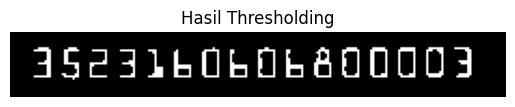

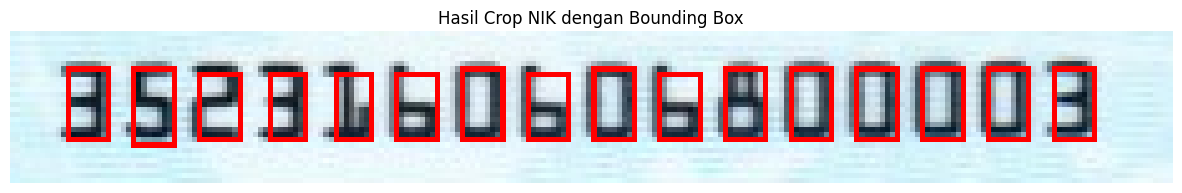

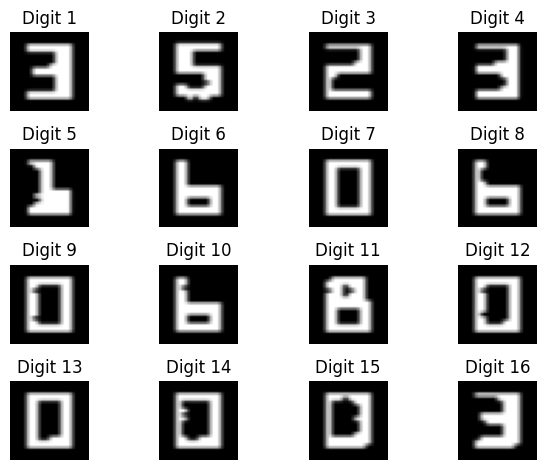

Jumlah digit yang terdeteksi: 16


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Memuat gambar dataset
ktp_image = cv.imread(path + ' ktp3.png')

# Mendefinisikan area untuk NIK
x, y, w, h = 110, 45, 230, 30
ktp_image = ktp_image[y:y+h, x:x+w]

# Menerapkan Gaussian Blur pada area yang dipotong
blurred_image = cv.GaussianBlur(ktp_image.copy(), (5, 5), 0.3)

# Mengubah gambar menjadi skala abu-abu
gray_image = cv.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)

# Thresholding menggunakan metode Otsu
_, binary_threshold = cv.threshold(gray_image.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
_, inverted_binary = cv.threshold(binary_threshold, 100, 255, cv.THRESH_BINARY_INV)

# Operasi morfologi dengan kernel kecil
kernel = np.ones((2, 2), np.uint8)
morph_image = cv.erode(inverted_binary, kernel, iterations=1)

# Visualisasi hasil thresholding
plt.imshow(morph_image, cmap='gray')
plt.title("Hasil Thresholding")
plt.axis("off")
plt.show()

# Menemukan kontur pada gambar hasil morfologi
contours, _ = cv.findContours(morph_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Menentukan batasan ukuran dan rasio aspek untuk karakter NIK
min_area, max_area = 1, 100
aspect_ratio_range = (0.01, 1.4)

# Salinan gambar asli untuk menggambar bounding box
output_image = ktp_image.copy()

# List untuk menyimpan karakter NIK yang berhasil diekstrak
nik_digits = []

# Menyimpan kotak pembatas kontur untuk pengurutan
bounding_boxes = []
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    area = cv.contourArea(contour)
    aspect_ratio = float(w) / h

    # Menyaring kontur berdasarkan ukuran dan rasio aspek
    if min_area <= area <= max_area and aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1]:
        bounding_boxes.append((x, y, w, h, contour))

# Mengurutkan kotak pembatas berdasarkan posisi horizontal (koordinat x)
bounding_boxes.sort(key=lambda box: box[0])

# Memproses setiap digit dari kotak pembatas
for box in bounding_boxes:
    x, y, w, h, contour = box

    # Memotong gambar digit
    digit_roi = inverted_binary[y:y+h, x:x+w]

    # Menambahkan padding opsional
    padding = 3
    digit_roi = cv.copyMakeBorder(digit_roi, padding, padding, padding, padding, cv.BORDER_CONSTANT, value=0)

    # Mengubah ukuran digit menjadi 28x28 piksel
    digit_roi = cv.resize(digit_roi, (28, 28))

    # Menambahkan digit ke dalam daftar
    nik_digits.append(digit_roi)

    # Menggambar bounding box pada gambar output
    cv.rectangle(output_image, (x, y), (x + w, y + h), (0, 0, 255), 1)

# Visualisasi hasil dengan bounding box
plt.figure(figsize=(15, 6))
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.title("Hasil Crop NIK dengan Bounding Box")
plt.axis("off")
plt.show()

# Menampilkan digit-digit NIK yang telah diekstrak
for i, digit in enumerate(nik_digits):
    plt.subplot(4, 4, i+1)
    plt.imshow(digit, cmap='gray')
    plt.title(f"Digit {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()
print(f"Jumlah digit yang terdeteksi: {len(nik_digits)}")

In [ ]:
!apt-get install -y texlive texlive-xetex texlive-latex-extra pandoc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
!jupyter nbconvert --to pdf /content/Week12_17.ipynb

[NbConvertApp] Converting notebook /content/Week12_17.ipynb to pdf
[NbConvertApp] Support files will be in Week12_17_files/
[NbConvertApp] Making directory ./Week12_17_files
[NbConvertApp] Writing 92270 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2315641 bytes to /content/Week12_17.pdf
